In [1]:
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset from local CSV files
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Split features and labels
trainY = train_df.iloc[:, 0].values
trainX = train_df.iloc[:, 1:].values

testY = test_df.iloc[:, 0].values
testX = test_df.iloc[:, 1:].values

In [4]:
# Reshape and normalize pixel values
trainX = trainX.reshape(-1, 28, 28, 1).astype("float32") / 255.0
testX = testX.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [5]:
# One-hot encode labels
trainY_cat = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY_cat = tf.keras.utils.to_categorical(testY, num_classes=10)

In [6]:
# Class names for display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

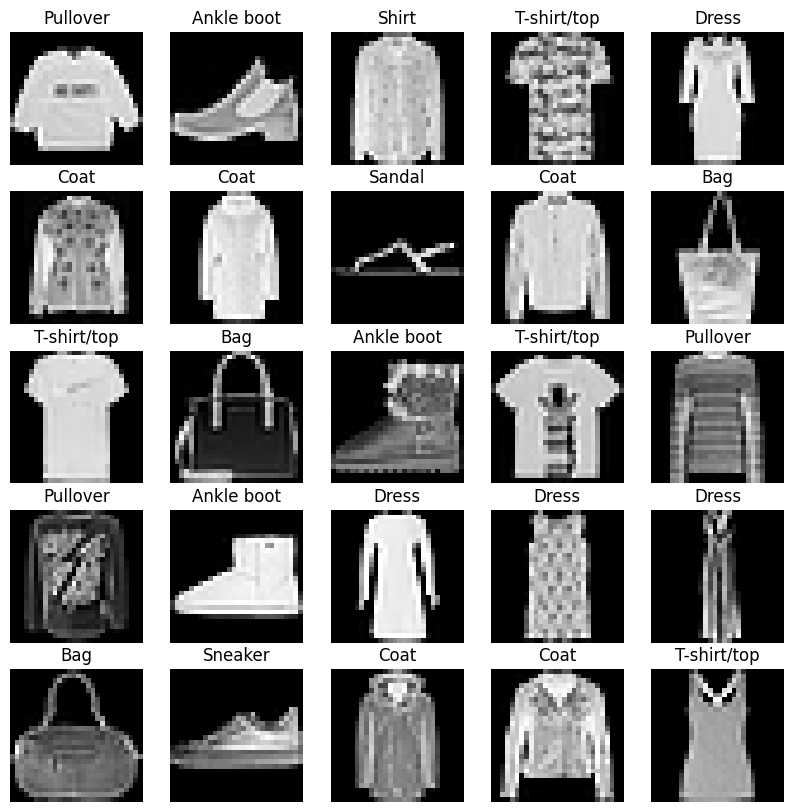

In [7]:
# Visualize some training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[trainY[i]])
    plt.axis('off')
plt.show()

In [8]:
# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(trainX, trainY_cat, validation_data=(testX, testY_cat), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.4416 - loss: 1.5413 - val_accuracy: 0.6999 - val_loss: 0.8634
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7092 - loss: 0.8359 - val_accuracy: 0.7342 - val_loss: 0.7392
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7428 - loss: 0.7392 - val_accuracy: 0.7733 - val_loss: 0.6658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7584 - loss: 0.6924 - val_accuracy: 0.7749 - val_loss: 0.6405
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7712 - loss: 0.6490 - val_accuracy: 0.7886 - val_loss: 0.6295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7831 - loss: 0.6220 - val_accuracy: 0.7879 - val_loss: 0.6027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7904 - loss: 0.6007 - val_accuracy: 0.8021 - val_loss: 0.5655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7954 -

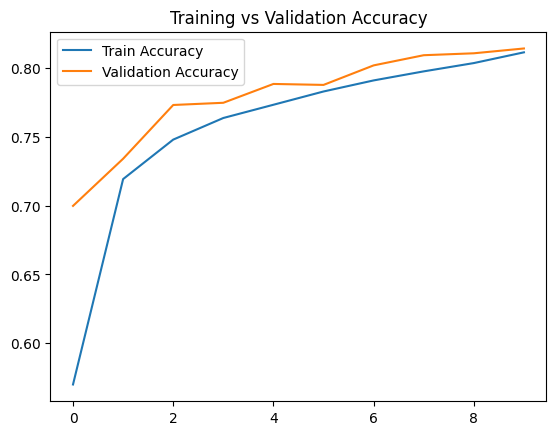

In [11]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate on test data
loss, acc = model.evaluate(testX, testY_cat)
print(f"Test Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8179 - loss: 0.5290
Test Accuracy: 81.44%


In [13]:
# Predictions and classification report
preds = model.predict(testX)
pred_labels = np.argmax(preds, axis=1)
print(metrics.classification_report(testY, pred_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.63      0.85      0.73      1000
     Trouser       0.94      0.97      0.95      1000
    Pullover       0.76      0.74      0.75      1000
       Dress       0.86      0.73      0.79      1000
        Coat       0.68      0.78      0.73      1000
      Sandal       0.89      0.94      0.92      1000
       Shirt       0.64      0.42      0.51      1000
     Sneaker       0.89      0.86      0.88      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.92      0.89      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



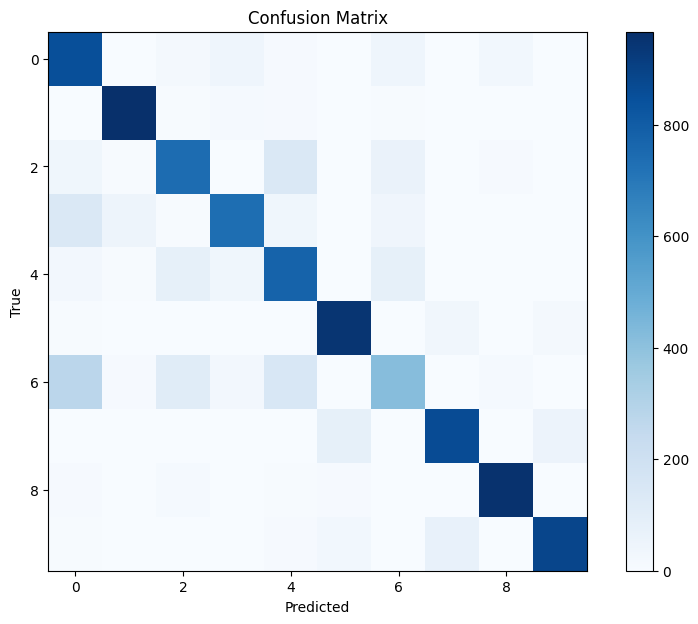

In [14]:
# Confusion matrix
cm = metrics.confusion_matrix(testY, pred_labels)
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


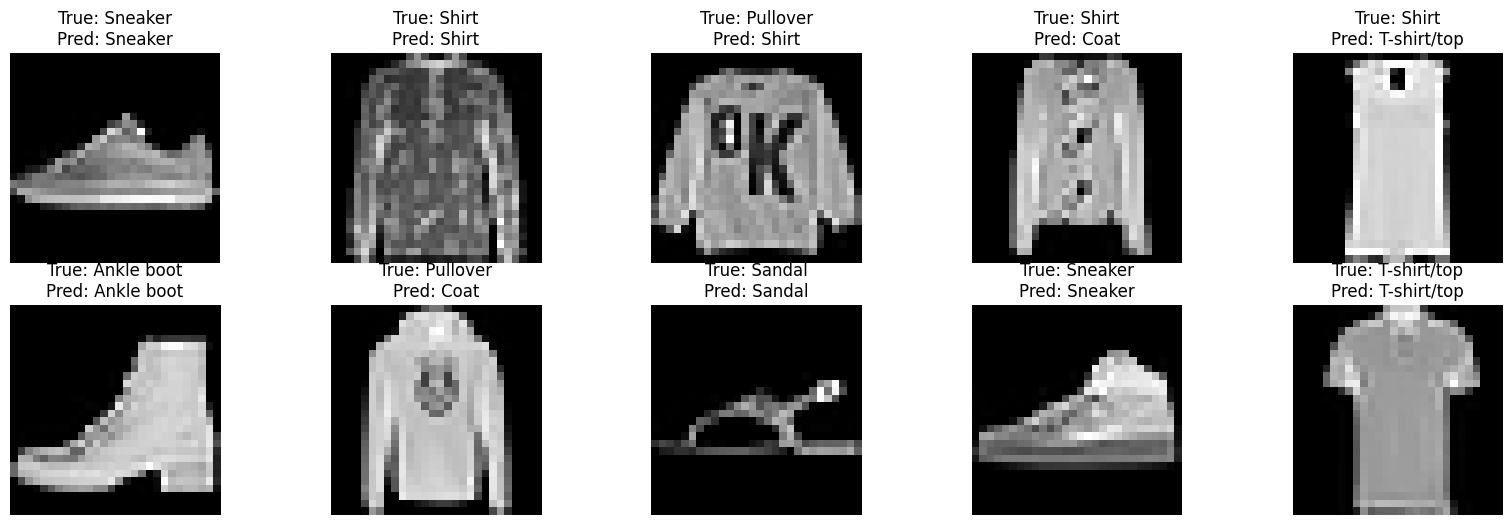

In [15]:
# Visualize random predictions
plt.figure(figsize=(20, 6))
for i, idx in enumerate(random.sample(range(len(testX)), 10)):
    img = testX[idx]
    true_label = class_names[testY[idx]]
    pred_label = class_names[np.argmax(model.predict(img.reshape(1, 28, 28, 1)))]
    plt.subplot(2, 5, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()